In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

In [105]:
trans=pd.read_csv(r'C:\Users\Chinthana\Desktop\Analytix Labs\Case Studies\Python\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv')

In [106]:
cust=pd.read_csv(r'C:\Users\Chinthana\Desktop\Analytix Labs\Case Studies\Python\Python Foundation Case Study 1 - Retail Case Study\Customer.csv')

In [107]:
prod=pd.read_csv(r'C:\Users\Chinthana\Desktop\Analytix Labs\Case Studies\Python\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv')

In [108]:
trans.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
dtype: object

In [109]:
trans.tran_date

0        28-02-2014
1        27-02-2014
2        24-02-2014
3        24-02-2014
4        23-02-2014
            ...    
23048    25-01-2011
23049    25-01-2011
23050    25-01-2011
23051    25-01-2011
23052    25-01-2011
Name: tran_date, Length: 23053, dtype: object

In [110]:
cust.DOB

0       02-01-1970
1       07-01-1970
2       08-01-1970
3       10-01-1970
4       11-01-1970
           ...    
5642    19-12-1992
5643    24-12-1992
5644    25-12-1992
5645    27-12-1992
5646    29-12-1992
Name: DOB, Length: 5647, dtype: object

In [111]:
trans['tran_date']=pd.to_datetime(trans['tran_date'], format='%d-%m-%Y')

In [112]:
cust.DOB

0       02-01-1970
1       07-01-1970
2       08-01-1970
3       10-01-1970
4       11-01-1970
           ...    
5642    19-12-1992
5643    24-12-1992
5644    25-12-1992
5645    27-12-1992
5646    29-12-1992
Name: DOB, Length: 5647, dtype: object

In [113]:
cust['DOB']=pd.to_datetime(cust['DOB'], format='%d-%m-%Y')

In [114]:
trans.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
dtype: object

In [115]:
cust.dtypes

customer_Id             int64
DOB            datetime64[ns]
Gender                 object
city_code             float64
dtype: object

In [116]:
#1 - Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly
trans_cust=pd.merge(trans, cust, left_on='cust_id', right_on='customer_Id', how='left')

In [117]:
trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  customer_Id       23053 non-null  int64         
 11  DOB               23053 non-null  datetime64[ns]
 12  Gender            23044 non-null  object        
 13  city_code         23045 non-null  float64       
dtypes: datetime64[ns](2), 

In [118]:
Customer_Final=pd.merge(trans_cust, prod, left_on=['prod_subcat_code', 'prod_cat_code'], right_on=['prod_sub_cat_code', 'prod_cat_code'], how='left')

In [119]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  datetime64[ns]
 3   prod_subcat_code   23053 non-null  int64         
 4   prod_cat_code      23053 non-null  int64         
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  customer_Id        23053 non-null  int64         
 11  DOB                23053 non-null  datetime64[ns]
 12  Gender             23044 non-null  object        
 13  city_code          23045 non-null  float64       
 14  prod_c

In [120]:
#2a - Get the column names and their corresponding data types
Customer_Final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

In [121]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  datetime64[ns]
 3   prod_subcat_code   23053 non-null  int64         
 4   prod_cat_code      23053 non-null  int64         
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  customer_Id        23053 non-null  int64         
 11  DOB                23053 non-null  datetime64[ns]
 12  Gender             23044 non-null  object        
 13  city_code          23045 non-null  float64       
 14  prod_c

In [122]:
#2b - Top/Bottom 10 observations
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-05-11,F,8.0,Electronics,5,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-06-08,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,1982-10-09,F,6.0,Electronics,8,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,1981-05-29,M,9.0,Home and kitchen,11,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,1971-04-21,M,9.0,Home and kitchen,12,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,275108,1971-11-04,F,8.0,Clothing,3,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,1979-11-27,F,3.0,Electronics,8,Personal Appliances


In [123]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,271982,1976-08-10,M,8.0,Books,10,Non-Fiction
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,273982,1991-10-12,M,4.0,Electronics,4,Mobiles
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,273031,1980-01-17,F,8.0,Books,6,DIY
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,272049,1975-06-28,F,6.0,Home and kitchen,11,Bath
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,266866,1974-04-18,M,4.0,Footwear,4,Kids
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,274550,1972-02-21,M,7.0,Books,12,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,270022,1984-04-27,M,9.0,Clothing,4,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,271020,1976-06-20,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,11,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,271961,1982-01-15,M,1.0,Books,11,Children


In [124]:
#2c - “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
Customer_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534,6.149091
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499,3.726372
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000,10.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000,12.000000


In [125]:
#2d - Frequency tables for all the categorical variables
Customer_Final.Store_type.value_counts()

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

In [126]:
Customer_Final.Gender.value_counts()

M    11811
F    11233
Name: Gender, dtype: int64

In [127]:
Customer_Final.prod_cat.value_counts()

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

In [128]:
Customer_Final.prod_subcat.value_counts()

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

In [129]:
pd.pivot_table(data=Customer_Final, index='Store_type', aggfunc='size')

Store_type
Flagship store    4577
MBR               4661
TeleShop          4504
e-Shop            9311
dtype: int64

In [130]:
pd.pivot_table(data=Customer_Final, index='Gender', aggfunc='size')

Gender
F    11233
M    11811
dtype: int64

In [131]:
pd.pivot_table(data=Customer_Final, index='prod_cat', aggfunc='size')

prod_cat
Bags                1998
Books               6069
Clothing            2960
Electronics         4898
Footwear            2999
Home and kitchen    4129
dtype: int64

In [132]:
pd.pivot_table(data=Customer_Final, index='prod_subcat', aggfunc='size')

prod_subcat
Academic                967
Audio and video         952
Bath                   1023
Cameras                 985
Children               1035
Comics                 1031
Computers               958
DIY                     989
Fiction                1043
Furnishing             1007
Kids                   1997
Kitchen                1037
Mens                   2912
Mobiles                1031
Non-Fiction            1004
Personal Appliances     972
Tools                  1062
Women                  3048
dtype: int64

In [133]:
#3 - Frequency tables for all the categorical variables
def chart(x):
    if x.dtype=='object':
        print(x)
        print('TYPE OF GRAPH : BAR')
        print(x.value_counts().plot(kind='bar'))
        plt.show()
    elif ((x.dtype=='int64') | (x.dtype=='float64')):
        print(x)
        print('TYPE OF GRAPH : HISTOGRAM')
        print(plt.hist(x))
        plt.show()

0        80712190438
1        29258453508
2        51750724947
3        93274880719
4        51750724947
            ...     
23048    94340757522
23049    89780862956
23050    85115299378
23051    72870271171
23052    77960931771
Name: transaction_id, Length: 23053, dtype: int64
TYPE OF GRAPH : HISTOGRAM
(array([2320., 2300., 2329., 2291., 2259., 2333., 2277., 2190., 2392.,
       2362.]), array([3.26899100e+06, 1.00016971e+10, 2.00001251e+10, 2.99985532e+10,
       3.99969812e+10, 4.99954093e+10, 5.99938374e+10, 6.99922654e+10,
       7.99906935e+10, 8.99891216e+10, 9.99875496e+10]), <BarContainer object of 10 artists>)


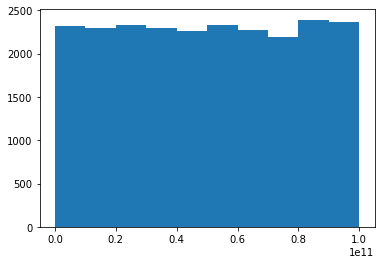

0        270351
1        270384
2        273420
3        271509
4        273420
          ...  
23048    274550
23049    270022
23050    271020
23051    270911
23052    271961
Name: cust_id, Length: 23053, dtype: int64
TYPE OF GRAPH : HISTOGRAM
(array([2184., 2226., 2482., 2365., 2363., 2342., 2289., 2265., 2175.,
       2362.]), array([266783. , 267631.2, 268479.4, 269327.6, 270175.8, 271024. ,
       271872.2, 272720.4, 273568.6, 274416.8, 275265. ]), <BarContainer object of 10 artists>)


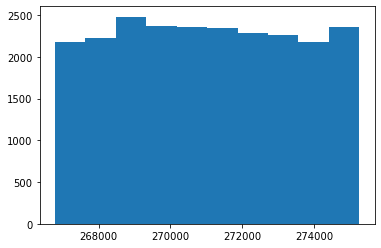

0         1
1         5
2         6
3        11
4         6
         ..
23048    12
23049     4
23050     2
23051    11
23052    11
Name: prod_subcat_code, Length: 23053, dtype: int64
TYPE OF GRAPH : HISTOGRAM
(array([3957., 3067., 4002.,  958.,  989., 1043.,  972.,  985., 2993.,
       4087.]), array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]), <BarContainer object of 10 artists>)


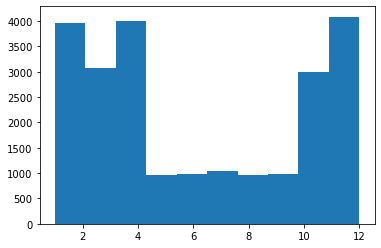

0        1
1        3
2        5
3        6
4        5
        ..
23048    5
23049    1
23050    6
23051    5
23052    5
Name: prod_cat_code, Length: 23053, dtype: int64
TYPE OF GRAPH : HISTOGRAM
(array([2960.,    0., 2999.,    0., 4898.,    0., 1998.,    0., 6069.,
       4129.]), array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]), <BarContainer object of 10 artists>)


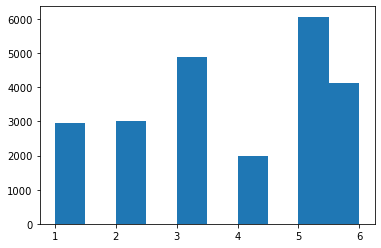

0       -5
1       -5
2       -2
3       -3
4       -2
        ..
23048    1
23049    1
23050    4
23051    3
23052    1
Name: Qty, Length: 23053, dtype: int64
TYPE OF GRAPH : HISTOGRAM
(array([ 457.,  458.,  405.,  438.,  419.,    0., 4214., 4123., 4174.,
       8365.]), array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), <BarContainer object of 10 artists>)


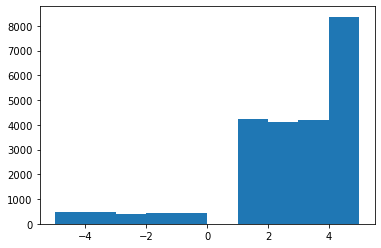

0        -772
1       -1497
2        -791
3       -1363
4        -791
         ... 
23048    1264
23049     677
23050    1052
23051    1142
23052     447
Name: Rate, Length: 23053, dtype: int64
TYPE OF GRAPH : HISTOGRAM
(array([ 496.,  446.,  464.,  411.,  360., 3413., 4335., 4336., 4349.,
       4443.]), array([-1.4990e+03, -1.1991e+03, -8.9920e+02, -5.9930e+02, -2.9940e+02,
        5.0000e-01,  3.0040e+02,  6.0030e+02,  9.0020e+02,  1.2001e+03,
        1.5000e+03]), <BarContainer object of 10 artists>)


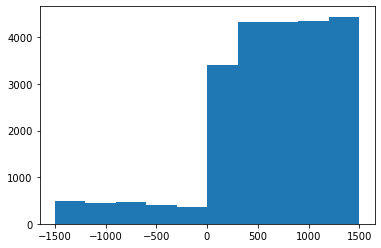

0        405.300
1        785.925
2        166.110
3        429.345
4        166.110
          ...   
23048    132.720
23049     71.085
23050    441.840
23051    359.730
23052     46.935
Name: Tax, Length: 23053, dtype: float64
TYPE OF GRAPH : HISTOGRAM
(array([4868., 5303., 3023., 2944., 1912., 1823., 1078., 1058.,  523.,
        521.]), array([  7.35 ,  85.365, 163.38 , 241.395, 319.41 , 397.425, 475.44 ,
       553.455, 631.47 , 709.485, 787.5  ]), <BarContainer object of 10 artists>)


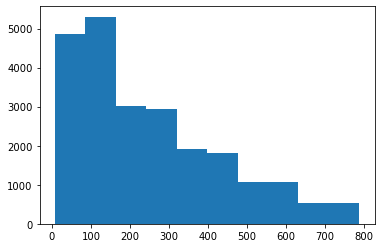

0       -4265.300
1       -8270.925
2       -1748.110
3       -4518.345
4       -1748.110
           ...   
23048    1396.720
23049     748.085
23050    4649.840
23051    3785.730
23052     493.935
Name: total_amt, Length: 23053, dtype: float64
TYPE OF GRAPH : HISTOGRAM
(array([ 109.,  231.,  360.,  564.,  913., 9062., 5505., 3435., 1930.,
        944.]), array([-8270.925 , -6615.0825, -4959.24  , -3303.3975, -1647.555 ,
           8.2875,  1664.13  ,  3319.9725,  4975.815 ,  6631.6575,
        8287.5   ]), <BarContainer object of 10 artists>)


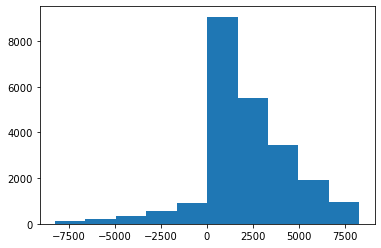

0          e-Shop
1          e-Shop
2        TeleShop
3          e-Shop
4        TeleShop
           ...   
23048      e-Shop
23049      e-Shop
23050         MBR
23051    TeleShop
23052    TeleShop
Name: Store_type, Length: 23053, dtype: object
TYPE OF GRAPH : BAR
AxesSubplot(0.125,0.125;0.775x0.755)


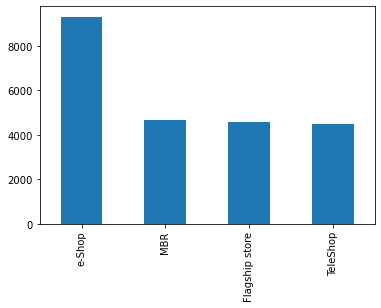

0        270351
1        270384
2        273420
3        271509
4        273420
          ...  
23048    274550
23049    270022
23050    271020
23051    270911
23052    271961
Name: customer_Id, Length: 23053, dtype: int64
TYPE OF GRAPH : HISTOGRAM
(array([2184., 2226., 2482., 2365., 2363., 2342., 2289., 2265., 2175.,
       2362.]), array([266783. , 267631.2, 268479.4, 269327.6, 270175.8, 271024. ,
       271872.2, 272720.4, 273568.6, 274416.8, 275265. ]), <BarContainer object of 10 artists>)


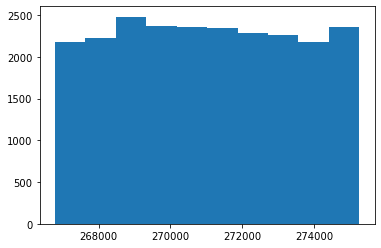

0        M
1        F
2        M
3        M
4        M
        ..
23048    M
23049    M
23050    M
23051    M
23052    M
Name: Gender, Length: 23053, dtype: object
TYPE OF GRAPH : BAR
AxesSubplot(0.125,0.125;0.775x0.755)


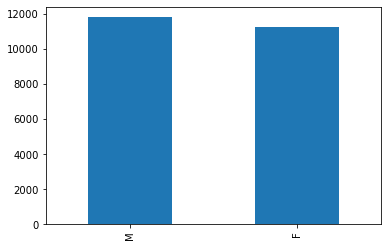

0        5.0
1        8.0
2        8.0
3        3.0
4        8.0
        ... 
23048    7.0
23049    9.0
23050    8.0
23051    2.0
23052    1.0
Name: city_code, Length: 23053, dtype: float64
TYPE OF GRAPH : HISTOGRAM
(array([2258., 2270., 2411., 2422., 2360., 2127., 2356., 2330., 2178.,
       2333.]), array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]), <BarContainer object of 10 artists>)


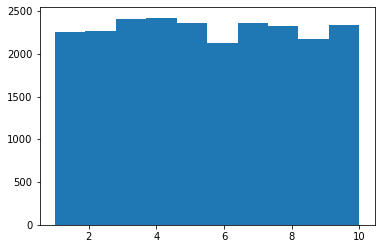

0                Clothing
1             Electronics
2                   Books
3        Home and kitchen
4                   Books
               ...       
23048               Books
23049            Clothing
23050    Home and kitchen
23051               Books
23052               Books
Name: prod_cat, Length: 23053, dtype: object
TYPE OF GRAPH : BAR
AxesSubplot(0.125,0.125;0.775x0.755)


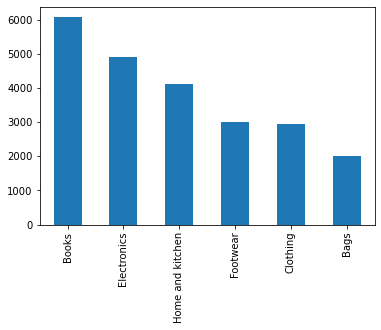

0         1
1         5
2         6
3        11
4         6
         ..
23048    12
23049     4
23050     2
23051    11
23052    11
Name: prod_sub_cat_code, Length: 23053, dtype: int64
TYPE OF GRAPH : HISTOGRAM
(array([3957., 3067., 4002.,  958.,  989., 1043.,  972.,  985., 2993.,
       4087.]), array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]), <BarContainer object of 10 artists>)


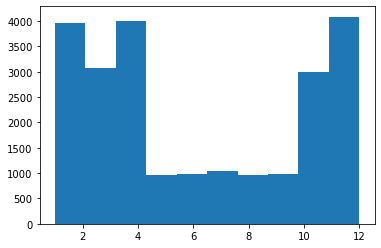

0             Women
1         Computers
2               DIY
3              Bath
4               DIY
            ...    
23048      Academic
23049          Mens
23050    Furnishing
23051      Children
23052      Children
Name: prod_subcat, Length: 23053, dtype: object
TYPE OF GRAPH : BAR
AxesSubplot(0.125,0.125;0.775x0.755)


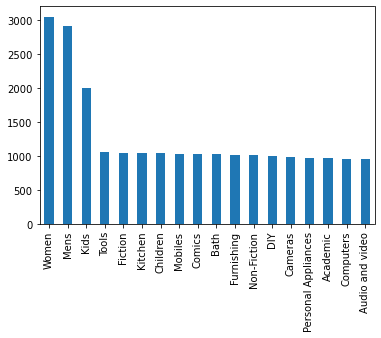

transaction_id       None
cust_id              None
tran_date            None
prod_subcat_code     None
prod_cat_code        None
Qty                  None
Rate                 None
Tax                  None
total_amt            None
Store_type           None
customer_Id          None
DOB                  None
Gender               None
city_code            None
prod_cat             None
prod_sub_cat_code    None
prod_subcat          None
dtype: object

In [134]:
Customer_Final.apply(chart)

In [135]:
#4a - Time period of the available transaction data
min_date=Customer_Final.tran_date.min()
min_date

Timestamp('2011-01-25 00:00:00')

In [136]:
max_date=Customer_Final.tran_date.max()
max_date

Timestamp('2014-02-28 00:00:00')

In [137]:
print('Time period of the availble transaction data is from ' +  pd.Timestamp.strftime(min_date, format='%Y-%m-%d') + ' to ' + pd.Timestamp.strftime(max_date, format='%Y-%m-%d')) 

Time period of the availble transaction data is from 2011-01-25 to 2014-02-28


In [138]:
#4b - Count of transactions where the total amount of transaction was negative
Customer_Final['transaction_id'][Customer_Final.total_amt<0].count()

2177

In [139]:
#5 - Analyze which product categories are more popular among females vs male customers.
gender_pop_category=Customer_Final[['Gender', 'prod_cat', 'transaction_id']].groupby(['Gender', 'prod_cat']).count().sort_values(by=['Gender', 'transaction_id'], ascending=False).reset_index().groupby('Gender').head(1)

In [140]:
gender_pop_category

,Gender,prod_cat,transaction_id
0,M,Books,3116
6,F,Books,2949


In [141]:
#6 - Which City code has the maximum customers and what was the percentage of customers from that city?
Customer_Final[['city_code', 'customer_Id']].groupby('city_code').nunique().sort_values(by='customer_Id', ascending=False).head(1)

,customer_Id
city_code,
3.0,576


In [142]:
(Customer_Final[['city_code', 'customer_Id']].groupby('city_code').nunique().sort_values(by='customer_Id', ascending=False)/Customer_Final[['city_code', 'customer_Id']].groupby('city_code').nunique().sum()).head(1)

,customer_Id
city_code,
3.0,0.104651


In [143]:
Customer_Final.cust_id.nunique()

5506

In [144]:
#7 - Which store type sells the maximum products by value and by quantity?
Customer_Final[['Store_type', 'Qty', 'total_amt']].groupby('Store_type').sum()

,Qty,total_amt
Store_type,,
Flagship store,11133,9.715688e+06
MBR,11194,9.674486e+06
TeleShop,10984,9.364781e+06
e-Shop,22763,1.982482e+07


In [145]:
Customer_Final[['Store_type', 'Qty', 'total_amt']].groupby('Store_type').sum().sort_values(by=['Qty'], ascending=False).head(1)

,Qty,total_amt
Store_type,,
e-Shop,22763,19824816.05


In [146]:
Customer_Final[['Store_type', 'Qty', 'total_amt']].groupby('Store_type').sum().sort_values(by=['total_amt'], ascending=False).head(1)

,Qty,total_amt
Store_type,,
e-Shop,22763,19824816.05


In [147]:
#8 - What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?
Customer_Final.loc[((Customer_Final.prod_cat=='Electronics') | (Customer_Final.prod_cat=='Clothing')), 'total_amt'][Customer_Final.Store_type=='Flagship store'].sum()

3409559.27

In [148]:
Customer_Final.loc[((Customer_Final.prod_cat=='Electronics') | (Customer_Final.prod_cat=='Clothing')) & (Customer_Final.Store_type=='Flagship store'), 'total_amt'].sum()

3409559.27

In [149]:
#9 - What was the total amount earned from "Male" customers under the "Electronics" category?
Customer_Final.loc[(Customer_Final.Gender=='M') & (Customer_Final.prod_cat=='Electronics'), 'total_amt'].sum()

5703109.424999999

In [150]:
#10 - How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?
cust_unique_trans=Customer_Final[['transaction_id', 'cust_id','prod_cat_code', 'prod_subcat_code']][Customer_Final.total_amt>0].groupby(['cust_id', 'prod_cat_code', 'prod_subcat_code']).count().reset_index()
cust_unique_trans

,cust_id,prod_cat_code,prod_subcat_code,transaction_id
0,266783,1,4,2
1,266783,2,1,1
2,266783,5,10,1
3,266784,3,4,1
4,266784,5,7,1
...,...,...,...,...
19273,275264,5,10,1
19274,275264,6,12,1
19275,275265,4,1,1
19276,275265,5,12,1


In [151]:
unique_trans_count=cust_unique_trans[['cust_id', 'transaction_id']].groupby('cust_id').count()
unique_trans_count

,transaction_id
cust_id,
266783,3
266784,3
266785,5
266788,4
266794,8
...,...
275257,4
275261,3
275262,2


In [152]:
unique_trans_count[unique_trans_count['transaction_id']>10]

,transaction_id
cust_id,


In [153]:
#Conclusion - there are no customers with more than 10 unique transactions

In [154]:
#11
import datetime as dt

In [156]:
dur_days=max_date-Customer_Final['DOB']

In [157]:
Customer_Final['age']=round(dur_days.dt.days/365)
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women,32.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-05-11,F,8.0,Electronics,5,Computers,41.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY,22.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-06-08,M,3.0,Home and kitchen,11,Bath,33.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,274550,1972-02-21,M,7.0,Books,12,Academic,42.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,270022,1984-04-27,M,9.0,Clothing,4,Mens,30.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,271020,1976-06-20,M,8.0,Home and kitchen,2,Furnishing,38.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,11,Children,44.0


In [158]:
#11a - For all customers aged between 25 - 35, What was the total amount spent for “Electronics” and “Books” product categories?
Customer_Final['total_amt'][((Customer_Final.prod_cat=='Electronics') | (Customer_Final.prod_cat=='Books')) & ((Customer_Final.age>=25) & (Customer_Final.age<=35))].sum()

11263882.695

In [159]:
#11b - For all customers aged between 25 - 35 ,What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
Customer_Final['total_amt'][((Customer_Final.tran_date>='2014-01-01') & (Customer_Final.tran_date<='2014-03-01')) & ((Customer_Final.age>=25) & (Customer_Final.age<=35))].sum()

1091302.42